In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号‘-’显示为方块的问题

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # 绘制ROC曲线

In [2]:
data = pd.read_csv('../数据/营销模型建模数据2.csv')
x = data.iloc[:,2:]
y = data.resp

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

##### 分箱的数据

In [35]:
data1 = pd.read_csv('../数据/营销模型建模数据3(分箱).csv')
x1 = data1.iloc[:,2:]
y1 = data1.resp
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=0)

#### 逻辑回归

##### 没调参数，惨不忍睹

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       959
           1       0.00      0.00      0.00       388

    accuracy                           0.71      1347
   macro avg       0.36      0.50      0.42      1347
weighted avg       0.51      0.71      0.59      1347

[[959   0]
 [388   0]]


Text(0.5, 1.0, 'ROC曲线-逻辑回归')

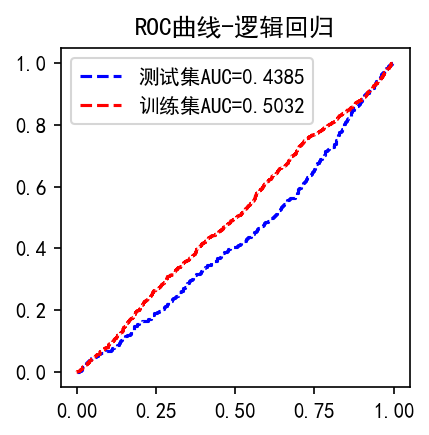

In [6]:
from sklearn.linear_model import LogisticRegression as LR
model = LR()
model.fit(x_train,y_train)
print(metrics.classification_report(y_test, model.predict(x_test)))
print(metrics.confusion_matrix(y_test, model.predict(x_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y_train,model.predict_proba(x_train)[:,1]) # 训练集
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-逻辑回归')

##### 自动化查找最优参数

In [7]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# 参数设置
params = {'C':[0.0001, 1, 100, 1000],
          'max_iter':[1, 10, 100, 500],
          'class_weight':['balanced', None],
          'solver':['liblinear','sag','lbfgs','newton-cg']
         }
model = LR()
clf = GridSearchCV(model,param_grid=params,cv=10)
clf.fit(x_train,y_train)

clf.best_params_ # 查看最佳参数组合

{'C': 1, 'class_weight': None, 'max_iter': 500, 'solver': 'newton-cg'}

#### 重新构建模型

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       959
           1       0.63      0.28      0.39       388

    accuracy                           0.74      1347
   macro avg       0.69      0.61      0.61      1347
weighted avg       0.72      0.74      0.71      1347

[[895  64]
 [280 108]]


Text(0.5, 1.0, 'ROC曲线-逻辑回归')

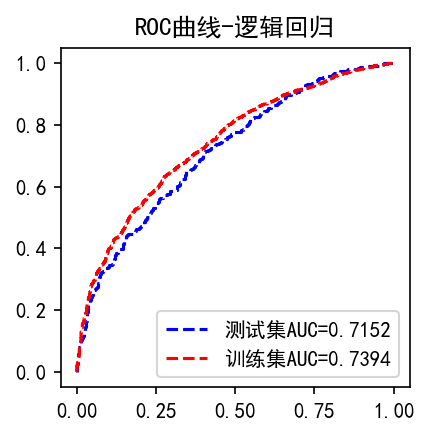

In [8]:
# clf.best_params_ = {'C': 1000, 'class_weight': None, 'max_iter': 100, 'solver': 'newton-cg'}
model = LR(**clf.best_params_)
model.fit(x_train,y_train)

print(metrics.classification_report(y_test, model.predict(x_test)))
print(metrics.confusion_matrix(y_test, model.predict(x_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y_train,model.predict_proba(x_train)[:,1]) # 训练集
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-逻辑回归')

#### 逻辑回归-使用分箱数据

In [9]:
# 自动化寻找最优参数
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# 参数设置
params = {'C':[0.0001, 1, 100, 1000],
          'max_iter':[1, 10, 100, 500],
          'class_weight':['balanced', None],
          'solver':['liblinear','sag','lbfgs','newton-cg']
         }
model = LR()
clf = GridSearchCV(model,param_grid=params,cv=10)
clf.fit(x1_train,y1_train)

clf.best_params_ # 查看最佳参数组合

{'C': 1, 'class_weight': None, 'max_iter': 10, 'solver': 'liblinear'}

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       961
           1       0.62      0.37      0.47       386

    accuracy                           0.76      1347
   macro avg       0.70      0.64      0.65      1347
weighted avg       0.74      0.76      0.73      1347

[[874  87]
 [242 144]]


Text(0.5, 1.0, 'ROC曲线-逻辑回归')

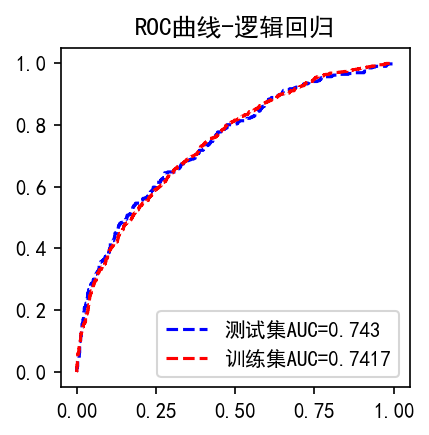

In [10]:
# 构建模型
model = LR(**clf.best_params_)
model.fit(x1_train,y1_train)

print(metrics.classification_report(y1_test, model.predict(x1_test)))
print(metrics.confusion_matrix(y1_test, model.predict(x1_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y1_test,model.predict_proba(x1_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y1_train,model.predict_proba(x1_train)[:,1]) # 训练集
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-逻辑回归')

#### 朴素贝叶斯

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       959
           1       0.54      0.17      0.26       388

    accuracy                           0.72      1347
   macro avg       0.64      0.56      0.54      1347
weighted avg       0.68      0.72      0.66      1347



Text(0.5, 1.0, 'ROC曲线-朴素贝叶斯')

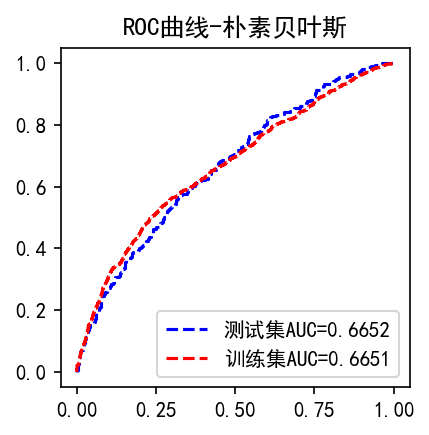

In [12]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()   # 使用默认配置初始化朴素贝叶斯
model.fit(x_train,y_train)    # 利用训练数据对模型参数进行估计

print(metrics.classification_report(y_test,model.predict(x_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y_train,model.predict_proba(x_train)[:,1]) # 训练集
# 绘制roc
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-朴素贝叶斯')

#### 朴素贝叶斯-分箱数据

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       961
           1       0.48      0.53      0.50       386

    accuracy                           0.70      1347
   macro avg       0.64      0.65      0.64      1347
weighted avg       0.71      0.70      0.70      1347



Text(0.5, 1.0, 'ROC曲线-朴素贝叶斯')

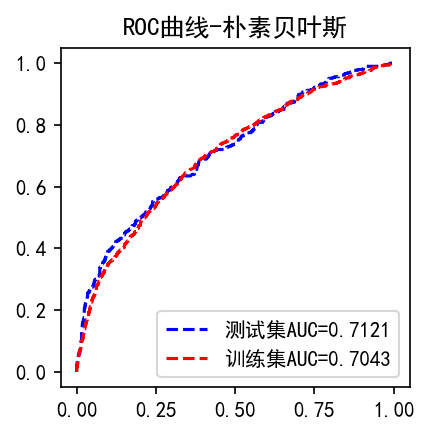

In [13]:
model = GaussianNB()   # 使用默认配置初始化朴素贝叶斯
model.fit(x1_train,y1_train)    # 利用训练数据对模型参数进行估计

print(metrics.classification_report(y1_test,model.predict(x1_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y1_test,model.predict_proba(x1_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y1_train,model.predict_proba(x1_train)[:,1]) # 训练集
# 绘制roc
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-朴素贝叶斯')

#### SVM

In [28]:
#进行数据据标准化处理（线性方式）
# from sklearn.preprocessing import StandardScaler
# s1=StandardScaler()
# s1.fit(x)
# x_standard=s1.transform(x)
# x2_train,x2_test,y2_train,y2_test = train_test_split(x_standard,y,test_size=0.3)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       961
           1       0.65      0.32      0.42       386

    accuracy                           0.75      1347
   macro avg       0.71      0.62      0.63      1347
weighted avg       0.74      0.75      0.72      1347

[[894  67]
 [264 122]]


Text(0.5, 1.0, 'ROC曲线-SVM')

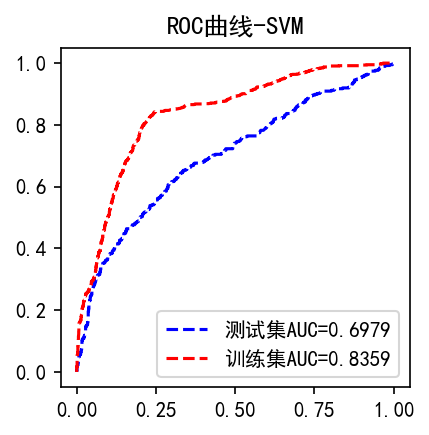

In [30]:
# 用分箱的数据代入就不用标准化了
from sklearn import svm
model = svm.SVC(probability=True)
model.fit(x1_train,y1_train)
print(metrics.classification_report(y1_test, model.predict(x1_test)))
print(metrics.confusion_matrix(y1_test, model.predict(x1_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y1_test,model.predict_proba(x1_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y1_train,model.predict_proba(x1_train)[:,1]) # 训练集
# 绘制roc
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-SVM')

#### 随机森林

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       959
           1       0.67      0.20      0.31       388

    accuracy                           0.74      1347
   macro avg       0.71      0.58      0.57      1347
weighted avg       0.72      0.74      0.69      1347

[[920  39]
 [310  78]]


Text(0.5, 1.0, 'ROC曲线-随机森林')

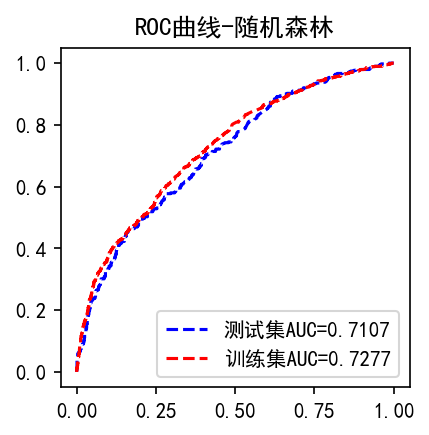

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)
print(metrics.classification_report(y_test, model.predict(x_test)))
print(metrics.confusion_matrix(y_test, model.predict(x_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y_train,model.predict_proba(x_train)[:,1]) # 训练集
# 绘制roc
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-随机森林')

#### 决策树

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       959
           1       0.69      0.22      0.34       388

    accuracy                           0.75      1347
   macro avg       0.72      0.59      0.59      1347
weighted avg       0.74      0.75      0.70      1347

[[920  39]
 [301  87]]


Text(0.5, 1.0, 'ROC曲线-决策树')

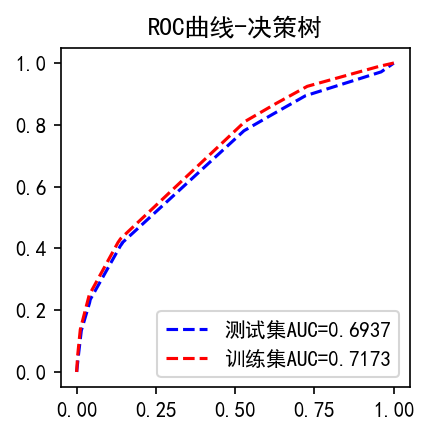

In [20]:
from sklearn.tree import DecisionTreeClassifier ##随机数分类模型
model = DecisionTreeClassifier(max_depth=4)
model.fit(x_train,y_train)
print(metrics.classification_report(y_test, model.predict(x_test)))
print(metrics.confusion_matrix(y_test, model.predict(x_test)))

# roc、auc计算
fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1]) # 测试集
fpr_train,tpr_train,th_train = metrics.roc_curve(y_train,model.predict_proba(x_train)[:,1]) # 训练集
# 绘制roc
plt.figure(dpi=150,figsize=(3,3))
plt.plot(fpr_test,tpr_test,'b--',label=f'测试集AUC={round(metrics.auc(fpr_test,tpr_test),4)}')
plt.plot(fpr_train,tpr_train,'r--',label=f'训练集AUC={round(metrics.auc(fpr_train,tpr_train),4)}')
plt.legend();plt.title('ROC曲线-决策树')